In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
housing_df = pd.read_csv('/content/drive/MyDrive/Datasets/housing.csv')

housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


DATA VIZUALIZATION

Text(0.5, 0, 'House Values')

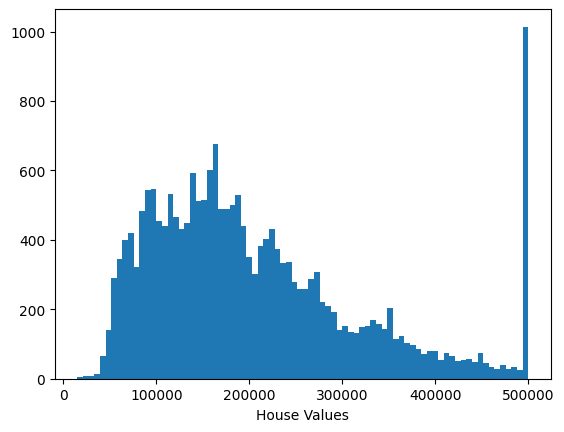

In [3]:
#histogram for the target variable (median_house_value)

#bins - number of columns
plt.hist(housing_df['median_house_value'], bins=80)
plt.xlabel("House Values")

- Distributed normally with few outliers
- Most houses are around the 100k-200k range
- X axis - Number of Houses Y axis - Price of Houses

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

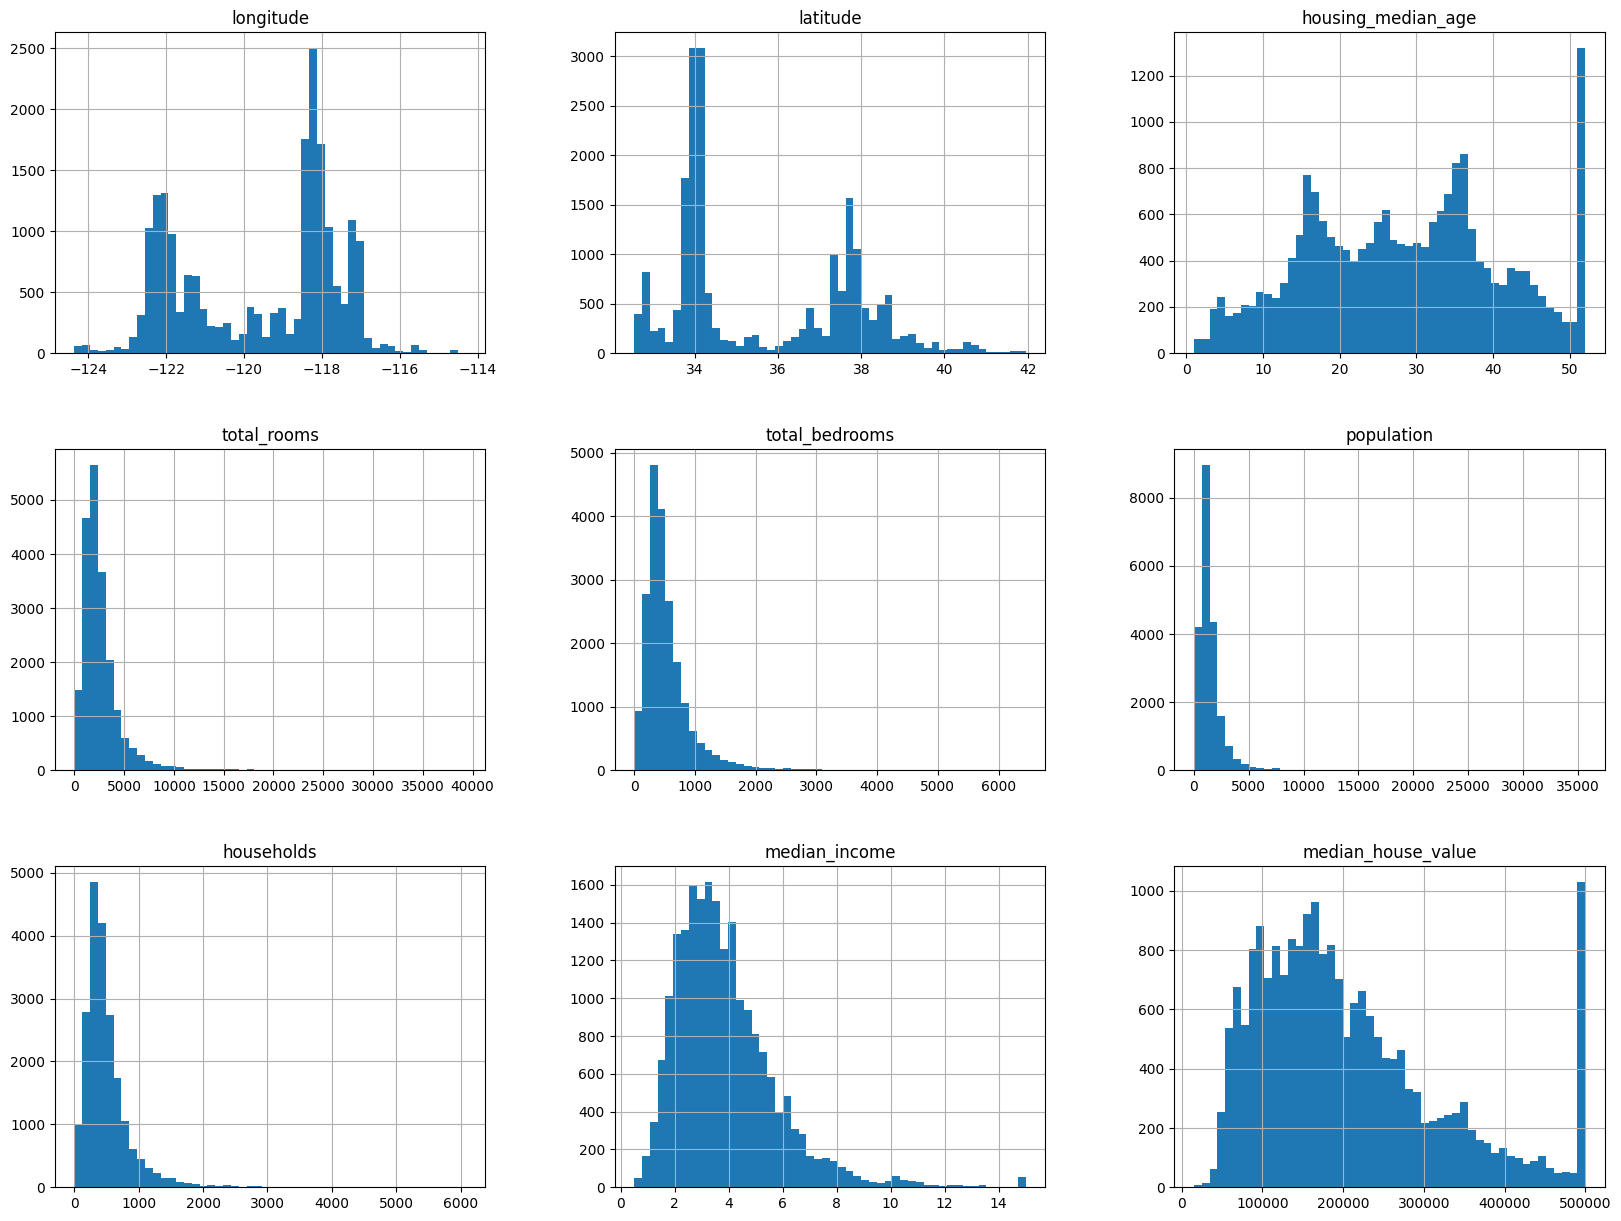

In [4]:
housing_df.hist(bins=50, figsize = (20,15))

- few outliers in housing_median_age and median_house_value
- median_income - not in USD - pre-processed with 14 - highest, 0.5 - lowest

In [5]:
#correlation matrix to study correlation between variables

numeric_df = housing_df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
print(corr)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

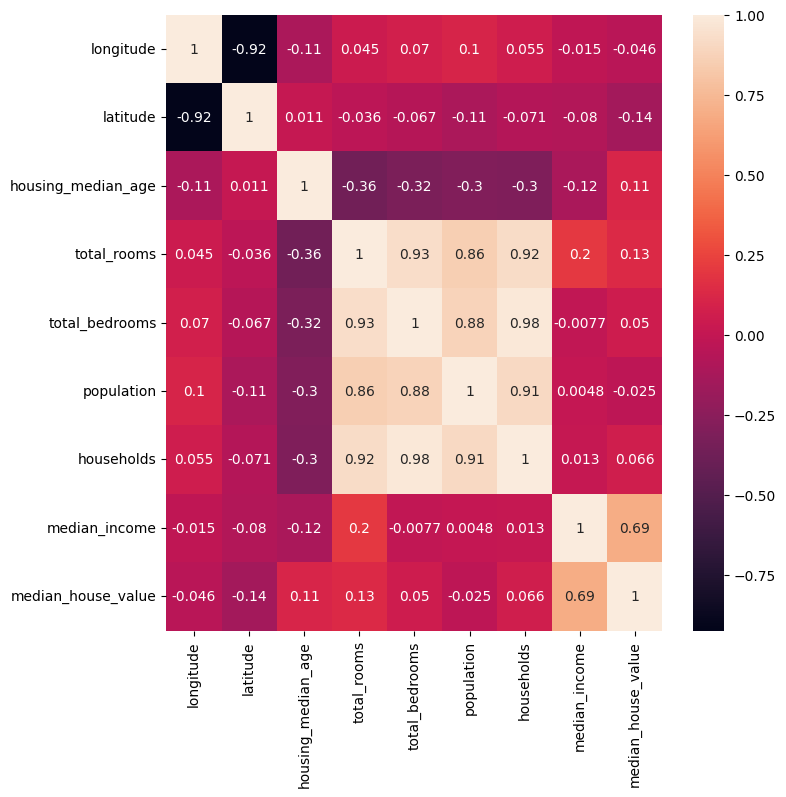

In [6]:
#plot heatmap

plt.figure(figsize = (8,8))

sns.heatmap(corr, annot =True)
plt.show()

highlyb correlated feautes can be removed becausen of duplicality - dimentionality reduction

DATA CLEANING ANF FEATURE ENGINEERING

In [7]:
housing_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

207 rows where total bedrooms is miising - but this is incorrect because all homes have to have one bedroom

In [8]:
# % of missing values

housing_df['total_bedrooms'].isnull().sum() / housing_df.shape[0] * 100

1.002906976744186

housing_df.shape returns the number of rows in the DataFrame housing_df.

handling missing data using Machine Learning

In [9]:
from sklearn.impute import KNNImputer

#create a temporary copy of the dataset
housing_df_temp = housing_df.copy()

#retrieve columns with numeric data
columns_list = [col for col in housing_df_temp.columns if housing_df_temp[col].dtype != 'object']

#extract columns that contain atleast one missing value
new_column_list = [col for col in housing_df_temp.loc[:, housing_df_temp.isnull().any()]]

#update temp database with numeric columns that have empty values
housing_df_temp = housing_df_temp[new_column_list]

In [10]:
#initialize KNNImputer to impute missing values
knn = KNNImputer(n_neighbors = 3)

#fit function trains the model
knn.fit(housing_df_temp)

# transform the data using the model
# applies the transformation model (ie knn) to data
array_Values = knn.transform(housing_df_temp)

# convert the array values to a dataframe with the appropriate column names
housing_df_temp = pd.DataFrame(array_Values, columns = new_column_list)

In [11]:
# confirm there are no columns with missing values
housing_df_temp.isnull().sum()

total_bedrooms    0
dtype: int64

In [12]:
# overlay the imputed column over the old column with missing values

# loop through the list of columns and overlay each one
for column_name in new_column_list:
    housing_df[column_name] = housing_df_temp.replace(housing_df[column_name],housing_df[column_name])

# confirm columns no longer contain null data
housing_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [13]:
#combining strong correlated features
#creating new fearures with combing features with negative correlation

housing_df['rooms_per_household'] = housing_df['total_rooms']/housing_df['households']
housing_df['bedrooms_per_room'] = housing_df['total_bedrooms']/housing_df['total_rooms']
housing_df['population_per_household'] = housing_df['population']/housing_df['households']

housing_df['coords'] = housing_df['longitude']/housing_df['latitude']

housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20640 non-null  float64
 12  population_per_household  20640 non-null  float64
 13  coords                    20640 non-null  float64
dtypes: flo

In [14]:
 #remove features with that we used above as part of dimentionality reduction

 housing_df = housing_df.drop('total_rooms', axis = 1)
 housing_df = housing_df.drop('households', axis = 1)
 housing_df = housing_df.drop('total_bedrooms', axis = 1)
 housing_df = housing_df.drop('population', axis = 1)
 housing_df = housing_df.drop('latitude', axis = 1)
 housing_df = housing_df.drop('longitude', axis = 1)

In [15]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   housing_median_age        20640 non-null  float64
 1   median_income             20640 non-null  float64
 2   median_house_value        20640 non-null  float64
 3   ocean_proximity           20640 non-null  object 
 4   rooms_per_household       20640 non-null  float64
 5   bedrooms_per_room         20640 non-null  float64
 6   population_per_household  20640 non-null  float64
 7   coords                    20640 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.3+ MB


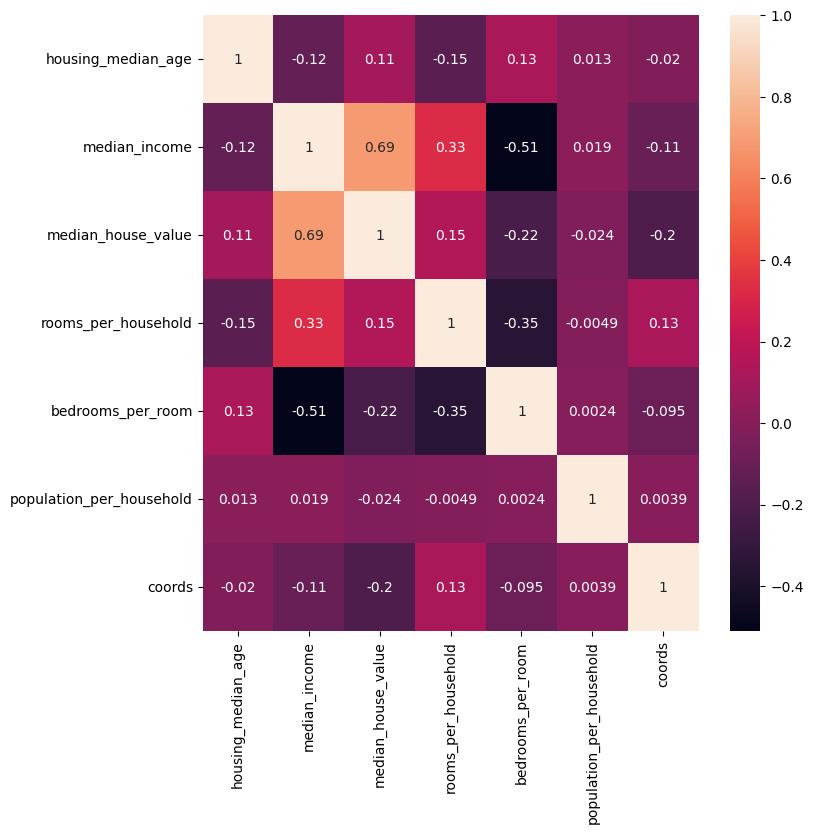

In [16]:
#new heatmap

numeric_df = housing_df.select_dtypes(include=[np.number])
corr = numeric_df.corr()

plt.figure(figsize = (8,8))

sns.heatmap(corr, annot =True)
plt.show()

ONE HOT ENCODING for Categorical Data

In [17]:
housing_df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [18]:
housing_df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [19]:
print(pd.get_dummies(housing_df['ocean_proximity']))

       <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0          False   False   False      True       False
1          False   False   False      True       False
2          False   False   False      True       False
3          False   False   False      True       False
4          False   False   False      True       False
...          ...     ...     ...       ...         ...
20635      False    True   False     False       False
20636      False    True   False     False       False
20637      False    True   False     False       False
20638      False    True   False     False       False
20639      False    True   False     False       False

[20640 rows x 5 columns]


In [20]:
housing_df_encoded = pd.get_dummies(data = housing_df, columns = ['ocean_proximity'])

encoded_columns = housing_df_encoded.columns[housing_df_encoded.columns.str.startswith('ocean_proximity')]
housing_df_encoded[encoded_columns] = housing_df_encoded[encoded_columns].astype(int)

In [21]:
housing_df_encoded.head()

,housing_median_age,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,coords,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41.0,8.3252,452600.0,6.984127,0.146591,2.555556,-3.226769,0,0,0,1,0
1,21.0,8.3014,358500.0,6.238137,0.155797,2.109842,-3.228209,0,0,0,1,0
2,52.0,7.2574,352100.0,8.288136,0.129516,2.802260,-3.229590,0,0,0,1,0
3,52.0,5.6431,341300.0,5.817352,0.184458,2.547945,-3.229855,0,0,0,1,0
4,52.0,3.8462,342200.0,6.281853,0.172096,2.181467,-3.229855,0,0,0,1,0


MODEL TRAINING

In [22]:
import sklearn
from sklearn.model_selection import train_test_split

# remove spaces from column names and convert all to lowercase and remove special characters as it could cause issues in the future
housing_df_encoded.columns = [c.lower().replace(' ', '_').replace('<', '_') for c in housing_df_encoded.columns]

# Split target variable and feature variables
X = housing_df_encoded[['housing_median_age', 'median_income','bedrooms_per_room','population_per_household','coords','ocean_proximity__1h_ocean',
                        'ocean_proximity_inland','ocean_proximity_island','ocean_proximity_near_bay','ocean_proximity_near_ocean']]
y = housing_df_encoded['median_house_value']

print(X)

       housing_median_age  median_income  bedrooms_per_room  \
0                    41.0         8.3252           0.146591   
1                    21.0         8.3014           0.155797   
2                    52.0         7.2574           0.129516   
3                    52.0         5.6431           0.184458   
4                    52.0         3.8462           0.172096   
...                   ...            ...                ...   
20635                25.0         1.5603           0.224625   
20636                18.0         2.5568           0.215208   
20637                17.0         1.7000           0.215173   
20638                18.0         1.8672           0.219892   
20639                16.0         2.3886           0.221185   

       population_per_household    coords  ocean_proximity__1h_ocean  \
0                      2.555556 -3.226769                          0   
1                      2.109842 -3.228209                          0   
2                      2.80

now that we have seperated our target variable from the dataset, we will divide out dataset into training and testing data

In [23]:
# Splitting the data into training and testing sets in numpy arrays
# We train the model with 70% of the samples and test with the remaining 30%
# X -> array with the inputs; y -> array of the outputs
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.3)

# Confirm how the data was split
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14448, 10)
(6192, 10)
(14448,)
(6192,)


random_state=42: This parameter sets a seed for the random number generator used to shuffle and split the data. By setting a fixed seed value (in this case, 42), you ensure that the split of the data is reproducible. This means that every time you run the code with the same random state, you will get the same split of training and testing data.

shuffle=True: This parameter indicates whether the data should be shuffled before being split. Shuffling is generally recommended to ensure that the training and testing sets are representative of the overall dataset, especially if the data is ordered in some way that could introduce bias.

test_size=0.3: This parameter specifies the proportion of the dataset to include in the test split. In this case, 0.3 means that 30% of the data will be allocated to the test set, and the remaining 70% will be allocated to the training set.

LINEAR REGRESSION

In [24]:
from sklearn.linear_model import LinearRegression

#creating a linear model using all the feature variables
reg_model = LinearRegression()

#training the model using training sets
reg_model.fit(X_train, y_train)

LinearRegression()

In [25]:
#running the prediction on the test data
y_pred_test = reg_model.predict(X_test)

In [26]:
#evaluating the model
#comparing the actual values (target variable) with the predicted value
pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})

pred_test_df

,Actual,Predicted
20046,47700.0,103743.050896
3024,45800.0,92451.250932
15663,500001.0,219490.963844
20484,218600.0,283292.425471
9814,278000.0,244228.861575
...,...,...
17505,237500.0,210121.340663
13512,67300.0,74907.098235
10842,218400.0,216609.962950
16559,119400.0,127975.072923


In [27]:
#evaluating the model using R^2 metric

#value of R^2 should be closer to 1
r2_reg_model_test = round(reg_model.score(X_test, y_test), 2)

r2_reg_model_test

0.56

RANDOM FOREST REGRESSION

In [28]:
#random forest is an ensemble of decision trees
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=10, random_state=10)

rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=10)

n_estimators=10: no of decision trees in the forest
random_state=10: sets the seed for the random number generator used in the model

In [29]:
y_rf_pred_test = rf_model.predict(X_test)

In [30]:
rf_pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_rf_pred_test})

rf_pred_test_df

,Actual,Predicted
20046,47700.0,47840.0
3024,45800.0,92680.0
15663,500001.0,446000.5
20484,218600.0,265320.0
9814,278000.0,240800.0
...,...,...
17505,237500.0,231680.1
13512,67300.0,69680.0
10842,218400.0,203930.0
16559,119400.0,126170.0


In [31]:
from sklearn.metrics import r2_score, mean_squared_error

score = r2_score(y_test, y_rf_pred_test)

score

0.7499472455943947

In [32]:
RMSE = mean_squared_error(y_test, y_rf_pred_test)**(0.5)

RMSE

57289.11495447338

XG BOOST REGRESSION

In [46]:
%pip install xgboost

In [76]:
import xgboost as xgb
import sklearn

print(f"XGBoost version: {xgb.__version__}")
print(f"Scikit-Learn version: {sklearn.__version__}")

XGBoost version: 2.0.3
Scikit-Learn version: 1.2.2


In [77]:
xgb_model = XGBRegressor()

In [78]:
try:
    xgb_model.fit(X_train, y_train)
except TypeError as e:
    print(f"TypeError: {e}")
    print("X_train type:", type(X_train))
    print("y_train type:", type(y_train))
    print("X_train shape:", X_train.shape)
    print("y_train shape:", y_train.shape)
    print("First few rows of X_train:\n", X_train.head())
    print("First few rows of y_train:\n", y_train.head())

In [79]:
#run the predictions on the training and testing data
y_xgb_pred_test = xgb_model.predict(X_test)

In [80]:
#compare the actual values (ie, target) with the values predicted by the model
xgb_pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_xgb_pred_test})

xgb_pred_test_df

,Actual,Predicted
20046,47700.0,66404.914062
3024,45800.0,86681.765625
15663,500001.0,449666.093750
20484,218600.0,262887.281250
9814,278000.0,218322.796875
...,...,...
17505,237500.0,227466.500000
13512,67300.0,64712.433594
10842,218400.0,218226.109375
16559,119400.0,123181.968750


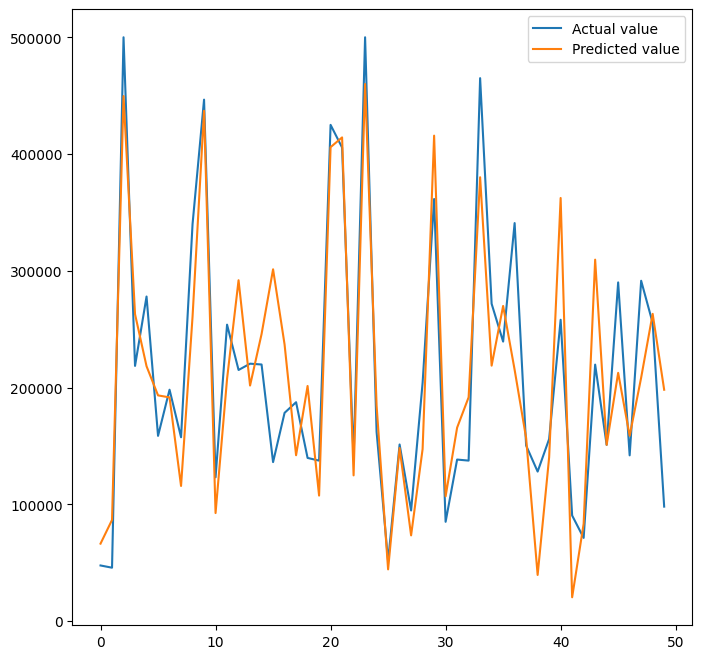

In [81]:
fig= plt.figure(figsize=(8,8))
xgb_pred_test_df = xgb_pred_test_df.reset_index()
xgb_pred_test_df = xgb_pred_test_df.drop(['index'],axis=1)
plt.plot(xgb_pred_test_df[:50])
plt.legend(['Actual value','Predicted value'])

In [82]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_xgb_pred_test)

score

0.7760252030846948

In [83]:
from sklearn.metrics import mean_squared_error
import math

mse = mean_squared_error(y_test, y_xgb_pred_test)
rmse = math.sqrt(mean_squared_error(y_test, y_xgb_pred_test))

print(mse)
print(rmse)

2939759040.9080276
54219.5448238735


In [84]:
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, y_xgb_pred_test))

36285.050324826894


HYPER TUNING

Not all ML algos can be tuned, but XG BOOST is tunable

In [85]:
#determine hyperparameter available for hyper tuning

xgb_model.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [86]:
#let's experiment with setting a few hyperparameters
xgb_model_2 = XGBRegressor(
    gamma=0.5,               # More conservative model, requires loss reduction > 0.5 for splits
    learning_rate=0.01,      # Slow learning rate, requires more trees for the same effect
    max_depth=6,             # Trees can grow up to 6 levels deep
    n_estimators=1000,       # Model will consist of 1000 trees
    n_jobs=16,               # Use 16 CPU cores for training
    objective='reg:squarederror',  # Regression task with squared error loss
    subsample=0.8,           # Use 80% of data for training each tree
    scale_pos_weight=0,      # No re-balancing of classes
    reg_alpha=0,             # No L1 regularization
    reg_lambda=1,            # L2 regularization applied
    verbosity=1              # Print progress and performance metrics
)

xgb_model_2.fit(X_train, y_train)

y_xgb_2_pred_test = xgb_model_2.predict(X_test)

In [87]:
# compare the actual values (ie, target) with the values predicted by the model
xgb_2_pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_xgb_2_pred_test})

xgb_2_pred_test_df

,Actual,Predicted
20046,47700.0,57542.468750
3024,45800.0,90140.296875
15663,500001.0,441852.906250
20484,218600.0,254412.796875
9814,278000.0,240307.781250
...,...,...
17505,237500.0,234835.000000
13512,67300.0,64357.855469
10842,218400.0,220460.828125
16559,119400.0,125676.593750


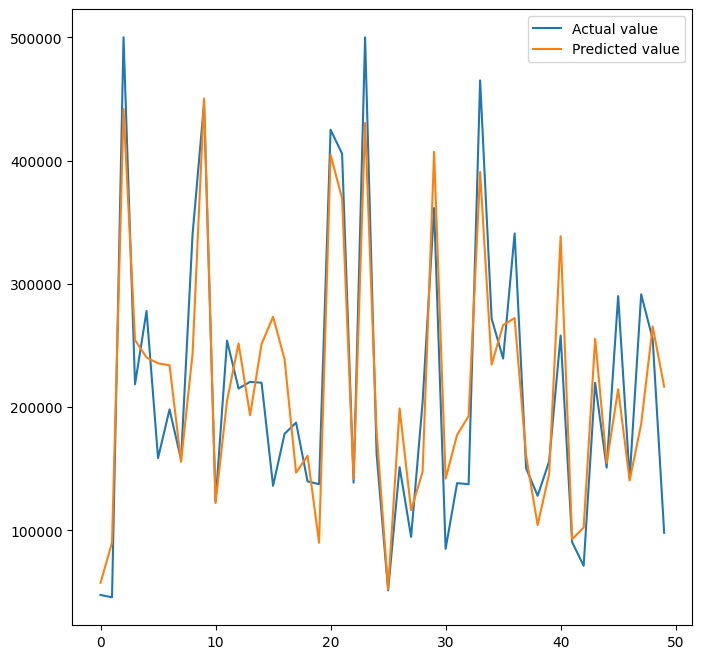

In [88]:
fig= plt.figure(figsize=(8,8))
xgb_2_pred_test_df = xgb_2_pred_test_df.reset_index()
xgb_2_pred_test_df = xgb_2_pred_test_df.drop(['index'],axis=1)
plt.plot(xgb_2_pred_test_df[:50])
plt.legend(['Actual value','Predicted value'])

In [98]:
from sklearn.metrics import mean_squared_error

mse = np.sqrt(mean_squared_error(y_test, y_xgb_2_pred_test))
print("MSE: %.2f" % (mse**(1/2.0)))

MSE: 230.63


In [99]:
# Determine accuracy uisng 𝑅^2
r2_xgb_model_2_test = round(xgb_model_2.score(X_test, y_test),2)

print("R^2 Test: {}".format(r2_xgb_model_2_test))

R^2 Test: 0.78


In [100]:
print(mean_absolute_error(y_test, y_xgb_2_pred_test))

35640.18900584928


Regression Metrics:

R^2: calculates difference between the actual values and the predictions made by the model, land between 0 to 1, closer to 1 is better, more of a relative measure
MSE: absolute measure of how much predicted results differ from actual values
RMSE: root of MSE
MAE: more direct representation of sum of error predictions, sum of all the differences between actual value and predicted value divided by the total number of predictions

In [101]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Predict on the test set
y_pred = xgb_model_2.predict(X_test)

# Calculate evaluation metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R^2: {r2}")
print(f"MAE: {mae}")

RMSE: 53192.16739714507
R^2: 0.784432745669121
MAE: 35640.18900584928


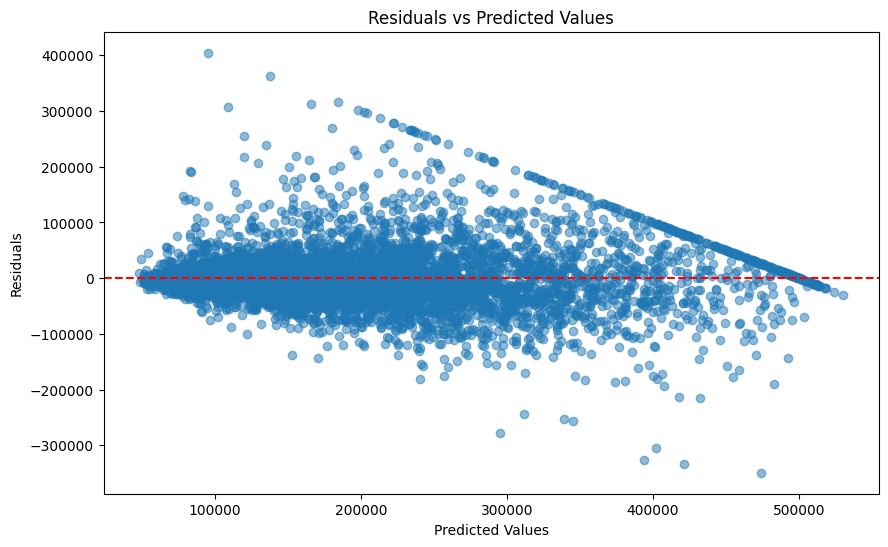

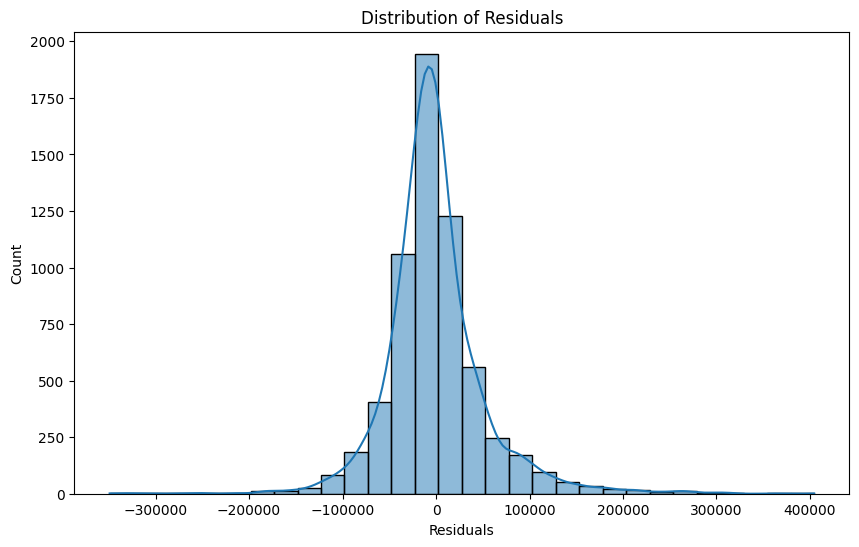

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Plot distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()


**Residuals vs. Predicted Values**
- This scatter plot shows the residuals (errors) on the y-axis and the predicted values on the x-axis.
- The red dashed line at y = 0 represents perfect predictions (no error).

The spread of the residuals increases as the predicted values increase. This pattern suggests heteroscedasticity, meaning the variance of the residuals is not constant. This could indicate that the model's errors are larger for higher predicted values.
There seems to be a slight downward trend in the residuals, which suggests the model might be underestimating higher values and overestimating lower values.

This histogram shows the distribution of the residuals, with a density curve overlayed.

**Normal Distribution**
The residuals appear to be roughly normally distributed, which is a good sign. However, there are some outliers on both ends of the distribution.
The majority of the residuals are centered around zero, indicating that the model does not have a significant bias.